In [2]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [5]:
##import dataset
df_census = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/relabeled_census.csv', encoding = "ISO-8859-1")
df_broadband = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/merged_broadband.csv', encoding = 'ISO-8859-1')

# Broadband Data EDA



In [6]:
df_broadband.head()

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,0,29639,1742.0,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,90%,40.0,3.0,0.0,5.0,3.0,3.0,3.0,3.0,21.0,SC,Abbeville,45001,0.948,0.034,0.110,0.002
1,1,29620,12934.0,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,98%,40.0,6.0,0.0,8.0,3.0,3.0,3.0,3.0,542.0,SC,Abbeville,45001,0.398,0.002,0.007,0.000
2,2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
3,3,29638,2944.0,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,95%,40.0,5.0,0.0,7.0,2.0,2.0,2.0,2.0,68.0,SC,Abbeville,45001,0.369,0.010,0.031,-0.001
4,4,29628,2759.0,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,95%,40.0,4.0,0.0,6.0,3.0,3.0,3.0,3.0,102.0,SC,Abbeville,45001,0.221,0.014,0.043,0.000


In [7]:
# check is there any missing values in dataframe as a whole
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                32735 non-null  int64  
 1   Zip                                       32735 non-null  int64  
 2   Population                                29485 non-null  float64
 3   WiredCount_2020                           29485 non-null  float64
 4   Fwcount_2020                              29485 non-null  float64
 5   AllProviderCount_2020                     29485 non-null  float64
 6   Wired25_3_2020                            29485 non-null  float64
 7   Wired100_3_2020                           29485 non-null  float64
 8   All25_3_2020                              29485 non-null  float64
 9   All100_3                                  29485 non-null  float64
 10  TestCount                         

## EDA - Missing Values


### 1.Broadband Merged Datasets

In [8]:
# Get the sum of missing values for each variable.
df_broadband.isnull().sum()

Unnamed: 0                                     0
Zip                                            0
Population                                  3250
WiredCount_2020                             3250
Fwcount_2020                                3250
AllProviderCount_2020                       3250
Wired25_3_2020                              3250
Wired100_3_2020                             3250
All25_3_2020                                3250
All100_3                                    3250
TestCount                                   6553
AverageMbps                                 6553
FastestAverageMbps                          6553
%Access to Terrestrial Broadband            3253
Lowest Priced Terrestrial Broadband Plan    6310
WiredCount_2015                             3252
Fwcount_2015                                3252
AllProviderCount_2015                       3252
Wired25_3_2015                              3252
Wired100_3_2015                             3252
All25_3_2015        

In [9]:
## To calculate the %of missing values for each variable
(
    ( 
        df_broadband.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(df_broadband)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
FastestAverageMbps,20.0
TestCount,20.0
AverageMbps,20.0
Lowest Priced Terrestrial Broadband Plan,19.3
Total_Enrolled_Households,14.8
%Access to Terrestrial Broadband,9.9
All100_3.1,9.9
All25_3_2015,9.9
Wired100_3_2015,9.9
Wired25_3_2015,9.9


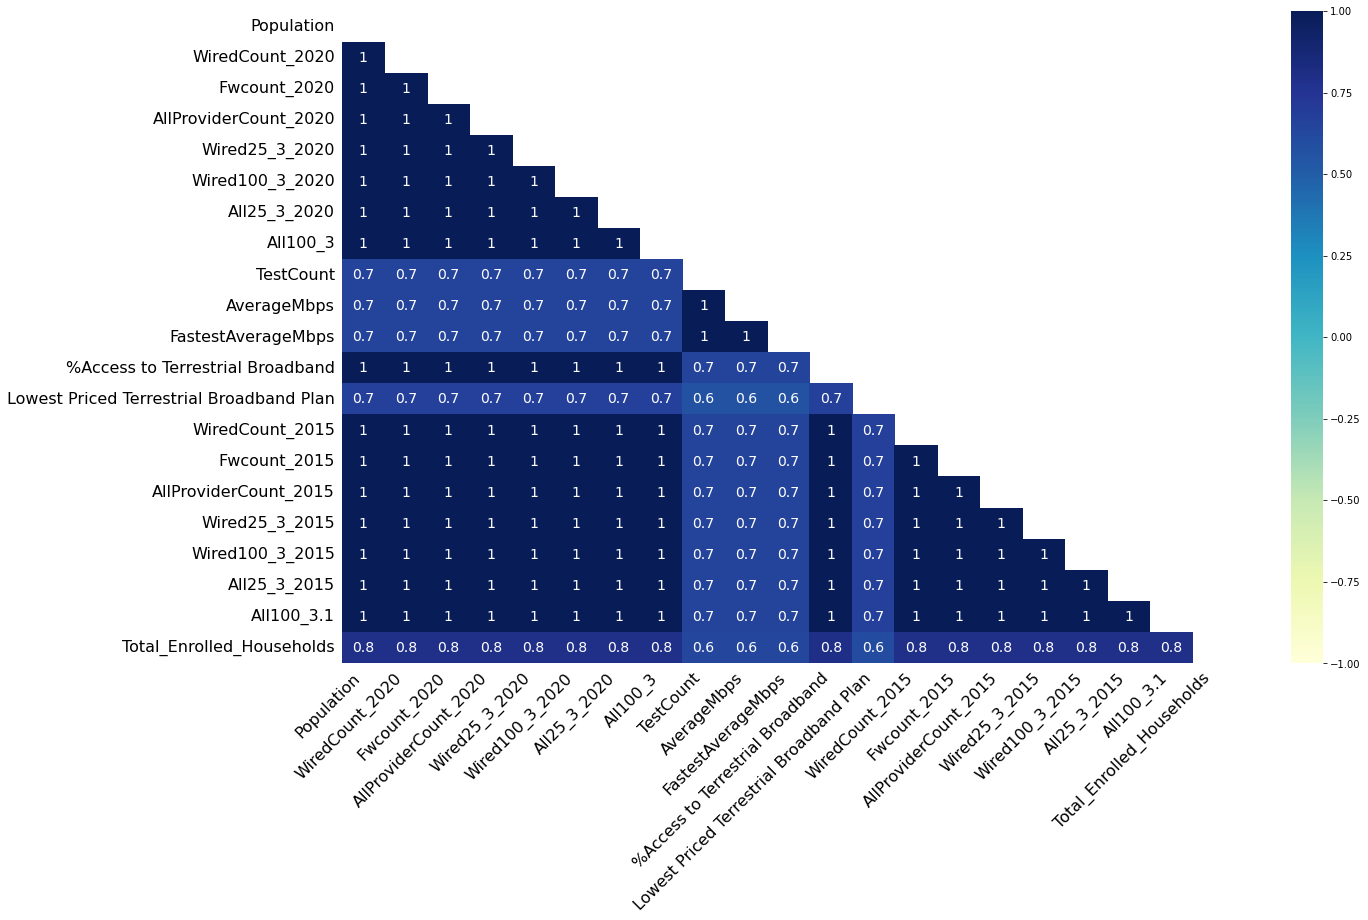

In [10]:
msno.heatmap(df_broadband, cmap='YlGnBu')

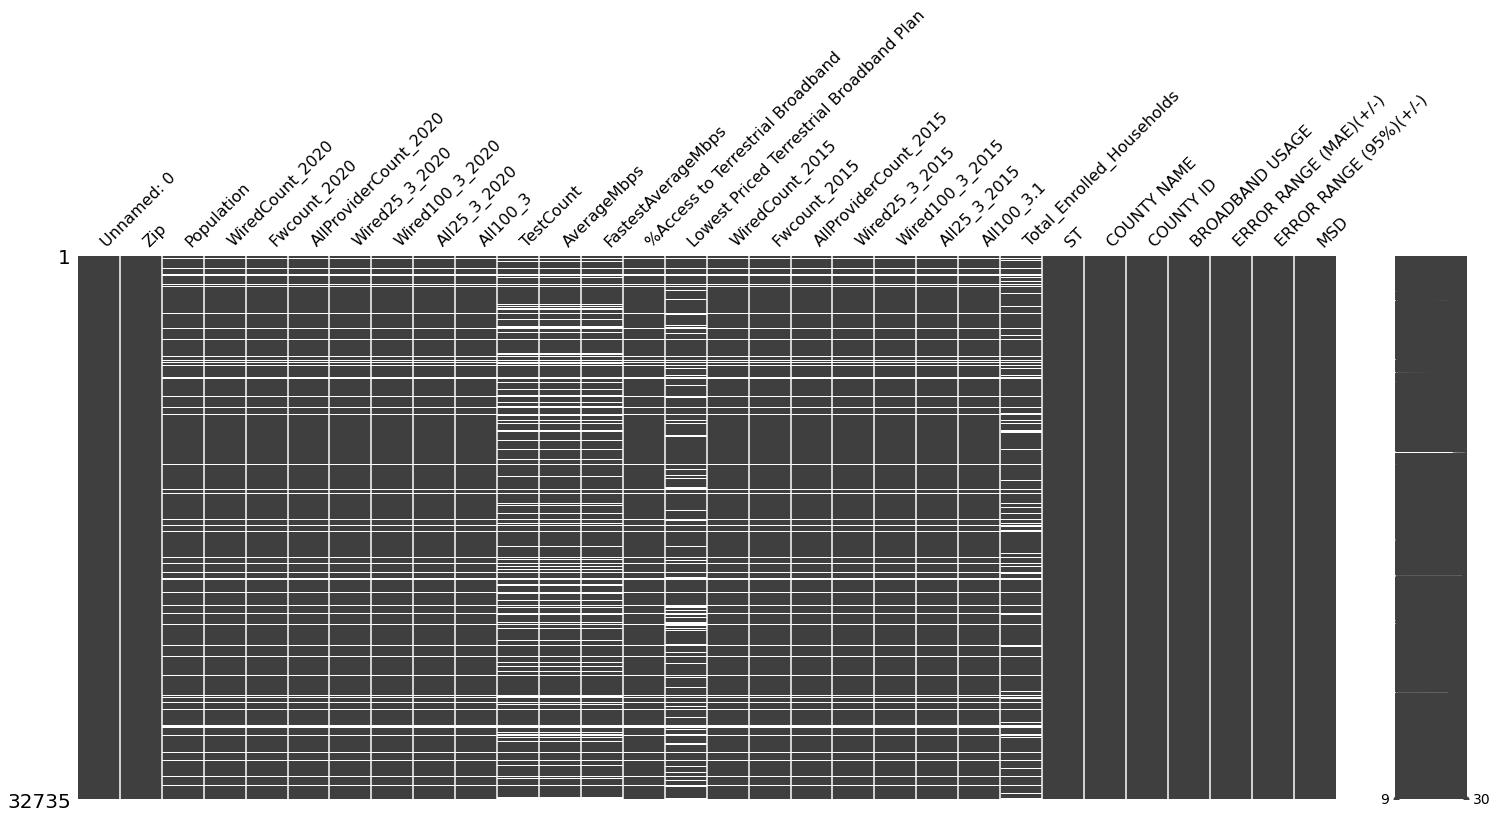

In [11]:
msno.matrix(df_broadband)

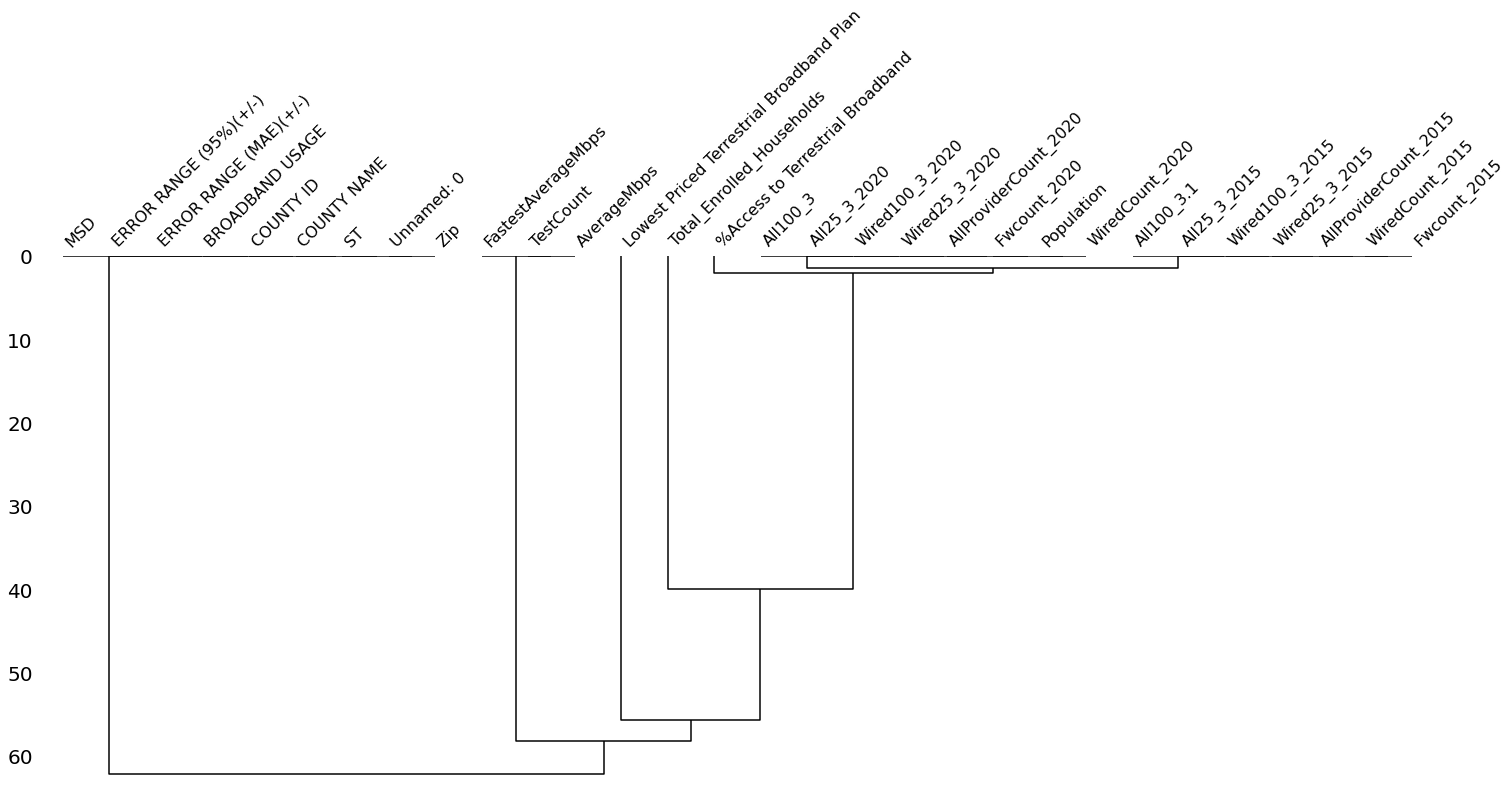

In [12]:
msno.dendrogram(df_broadband)


In [13]:
# To select only the rows with NaN values
df_missing = df_broadband[pd.isnull(df_broadband).any(axis=1)]
df_missing
## Notice that we have 9342 observations/rows that contain one or more missing values. Thats roughly 28.5% of data contains missing values
## We want to then look at if some states/counties have more missing values than others

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
2,2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
11,11,70556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,Acadia Parish,22001,0.139,0.065,0.228,0.013
12,12,70534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,Acadia Parish,22001,0.083,0.034,0.110,0.002
19,19,23442,1059.0,3.0,2.0,10.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,86%,59.99,4.0,1.0,7.0,1.0,1.0,1.0,1.0,27.0,VA,Accomack,51001,0.322,0.027,0.086,0.001
20,20,23480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,Accomack,51001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32723,32723,80727,425.0,2.0,2.0,9.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,100%,79.95,2.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,CO,Yuma,8125,0.000,0.065,0.228,0.013
32724,32724,80822,260.0,2.0,1.0,8.0,1.0,1.0,3.0,1.0,175.0,21.74,39.18,97%,79.95,2.0,0.0,3.0,1.0,0.0,1.0,0.0,NaN,CO,Yuma,8125,1.000,0.083,0.302,0.021
32731,32731,78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,Zavala,48507,0.071,0.020,0.061,0.000
32732,32732,57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,Ziebach,46137,0.000,0.110,0.406,0.031


In [14]:
## for each state, we look at how many datapoints are missing for each column
df_missing.set_index('ST').isna().groupby(level=0).sum()

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,73,73,73,0,199,0,0,0,0,0,0,0,96,0,0,0,0,0,0
AL,0,0,44,44,44,44,44,44,44,44,122,122,122,44,116,44,44,44,44,44,44,44,58,0,0,0,0,0,0
AR,0,0,64,64,64,64,64,64,64,64,202,202,202,64,213,64,64,64,64,64,64,64,86,0,0,0,0,0,0
AZ,0,0,98,98,98,98,98,98,98,98,118,118,118,98,134,98,98,98,98,98,98,98,103,0,0,0,0,0,0
CA,0,0,174,174,174,174,174,174,174,174,250,250,250,174,303,175,175,175,175,175,175,175,240,0,0,0,0,0,0
CO,0,0,82,82,82,82,82,82,82,82,132,132,132,83,143,82,82,82,82,82,82,82,116,0,0,0,0,0,0
CT,0,0,14,14,14,14,14,14,14,14,22,22,22,14,14,14,14,14,14,14,14,14,17,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,3,3,3,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0
DE,0,0,7,7,7,7,7,7,7,7,12,12,12,7,7,7,7,7,7,7,7,7,10,0,0,0,0,0,0


In [15]:
## what percentage of datapoints are missing by State
df_broadband.groupby('ST').apply(lambda x: x.isnull().sum()/len(x)*100)


,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.083665,29.083665,29.083665,0.000000,79.282869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.247012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,19.122257,19.122257,19.122257,6.896552,18.181818,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,9.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,34.295416,34.295416,34.295416,10.865874,36.162988,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,14.601019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,0.0,0.0,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,29.573935,29.573935,29.573935,24.561404,33.583960,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,25.814536,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA,0.0,0.0,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,14.400922,14.400922,14.400922,10.023041,17.453917,10.080645,10.080645,10.080645,10.080645,10.080645,10.080645,10.080645,13.824885,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO,0.0,0.0,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,25.680934,25.680934,25.680934,16.147860,27.821012,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,22.568093,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT,0.0,0.0,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,7.913669,7.913669,7.913669,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,6.115108,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,0.000000,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE,0.0,0.0,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,18.750000,18.750000,18.750000,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,15.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###1.1 Broadband Data - AR

In [16]:
## Creating an AR df of just AR zipcodes that were in the zips df
ar_df = df_broadband[df_broadband.ST=="AR"]
ar_df

##589 zip codes

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
890,890,72003,746.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,164.0,11.26,20.40,1%,NaN,1.0,0.0,3.0,1.0,0.0,1.0,0.0,8.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
891,891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,AR,Arkansas,5001,1.000,0.197,0.869,0.022
892,892,72055,849.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0,18.20,19.47,52%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
893,893,72073,1139.0,1.0,1.0,7.0,0.0,0.0,2.0,0.0,12.0,1.44,1.69,0%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,21.0,AR,Arkansas,5001,0.086,0.027,0.086,0.001
894,894,72026,393.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,2.49,4.47,24%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,AR,Arkansas,5001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32516,32516,72857,1430.0,2.0,1.0,8.0,1.0,1.0,4.0,3.0,124.0,52.90,110.27,69%,19.95,1.0,0.0,3.0,1.0,0.0,1.0,0.0,23.0,AR,Yell,5149,0.435,0.023,0.072,0.000
32517,32517,72833,4384.0,2.0,0.0,6.0,1.0,1.0,3.0,2.0,444.0,29.87,61.90,87%,19.95,4.0,0.0,6.0,2.0,1.0,2.0,1.0,42.0,AR,Yell,5149,0.500,0.010,0.031,-0.001
32518,32518,72827,187.0,1.0,0.0,5.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,57%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,AR,Yell,5149,0.185,0.110,0.406,0.031
32519,32519,72860,375.0,3.0,0.0,7.0,2.0,1.0,4.0,2.0,3.0,36.20,83.98,100%,19.95,2.0,0.0,4.0,1.0,0.0,1.0,0.0,4.0,AR,Yell,5149,0.258,0.050,0.170,0.007


In [17]:
## To calculate the %of missing values for each variable for AR
(
    ( 
        ar_df.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(ar_df)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
Lowest Priced Terrestrial Broadband Plan,36.2
FastestAverageMbps,34.3
TestCount,34.3
AverageMbps,34.3
Total_Enrolled_Households,14.6
%Access to Terrestrial Broadband,10.9
All100_3.1,10.9
All25_3_2015,10.9
Wired100_3_2015,10.9
Wired25_3_2015,10.9


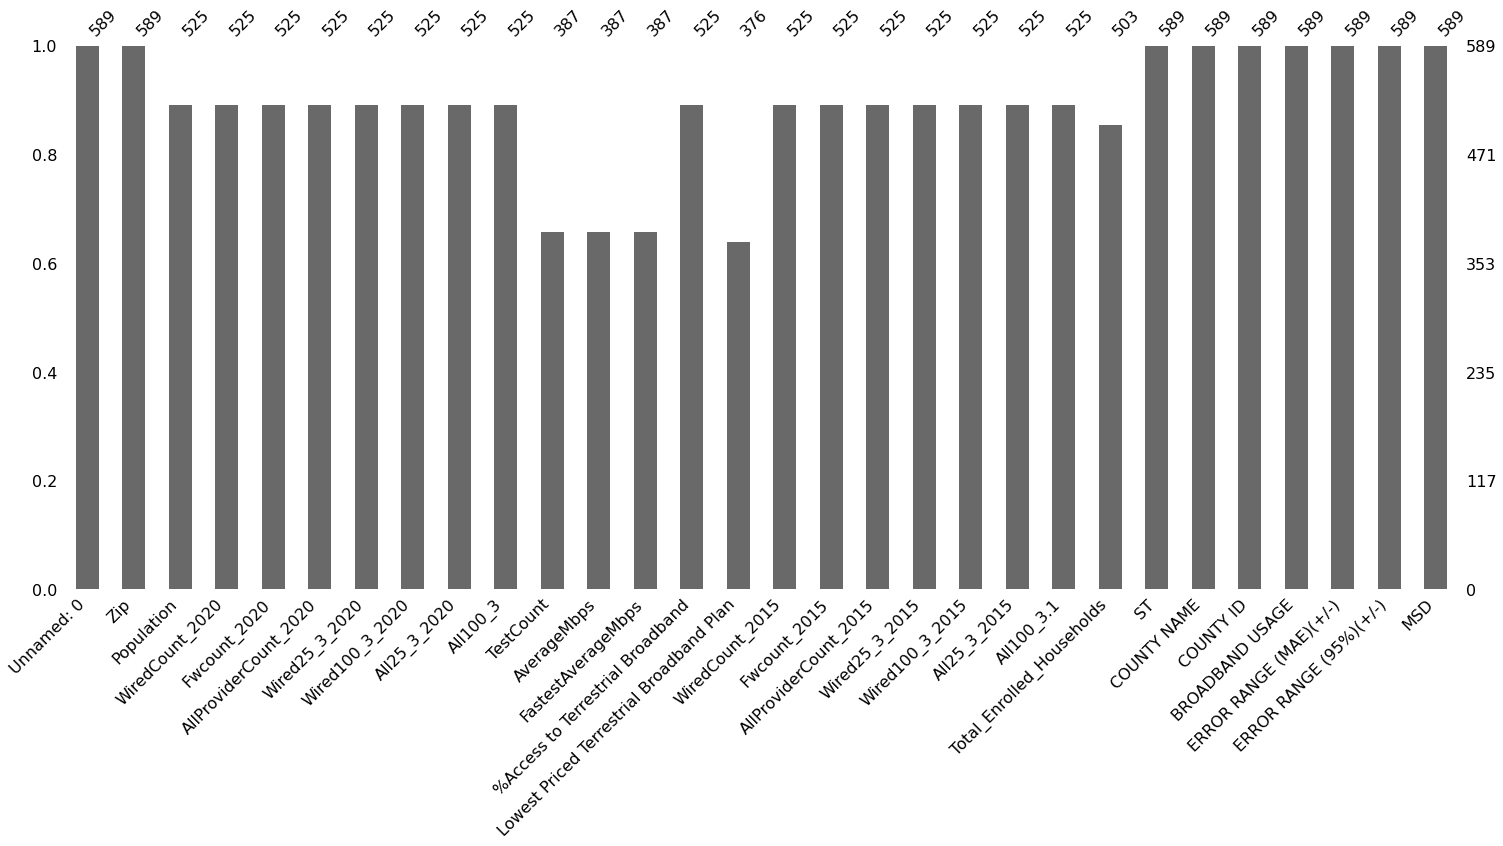

In [18]:
msno.bar(ar_df)


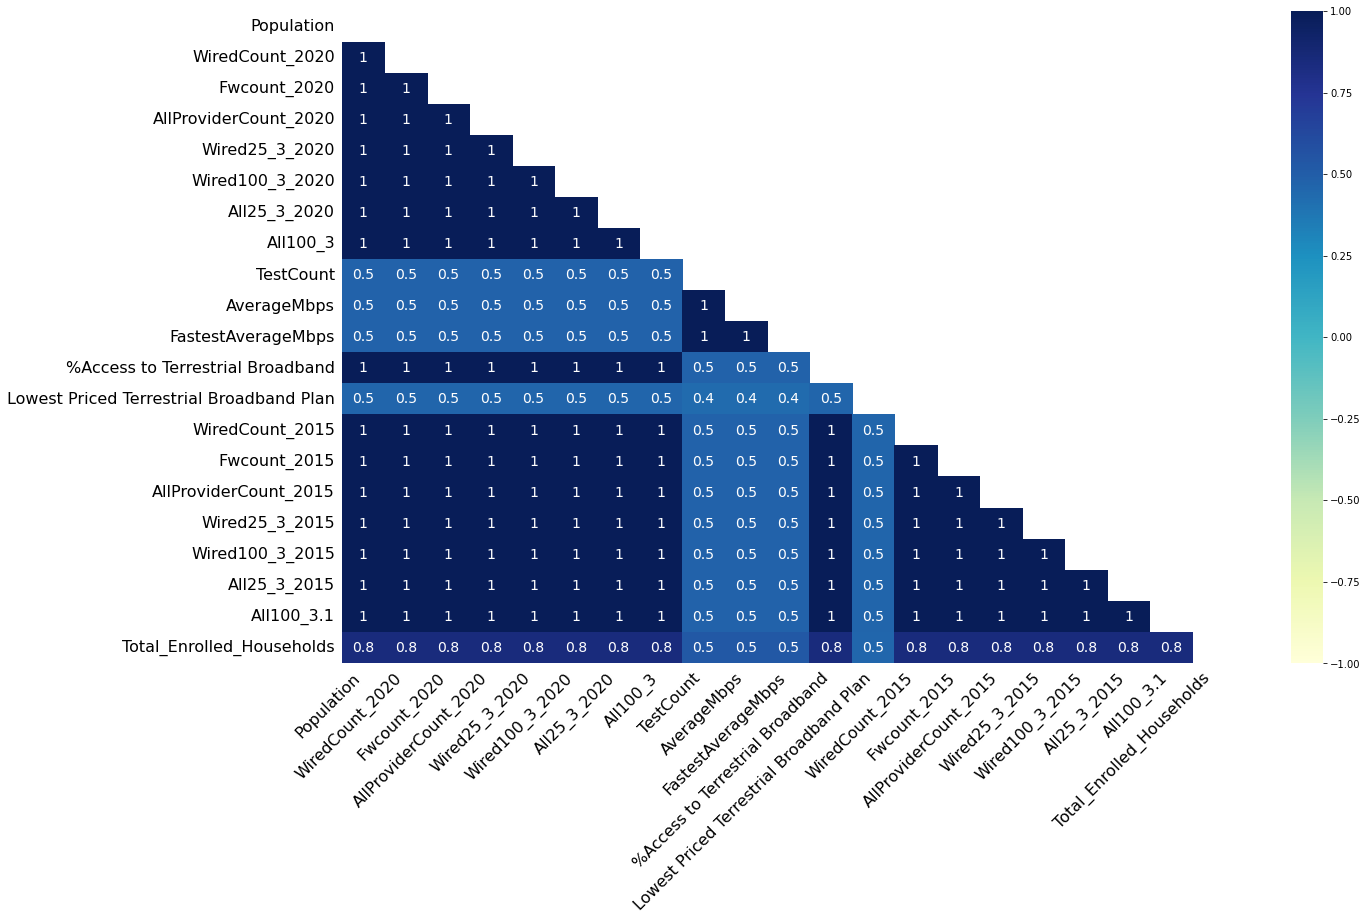

In [19]:
msno.heatmap(ar_df, cmap='YlGnBu')

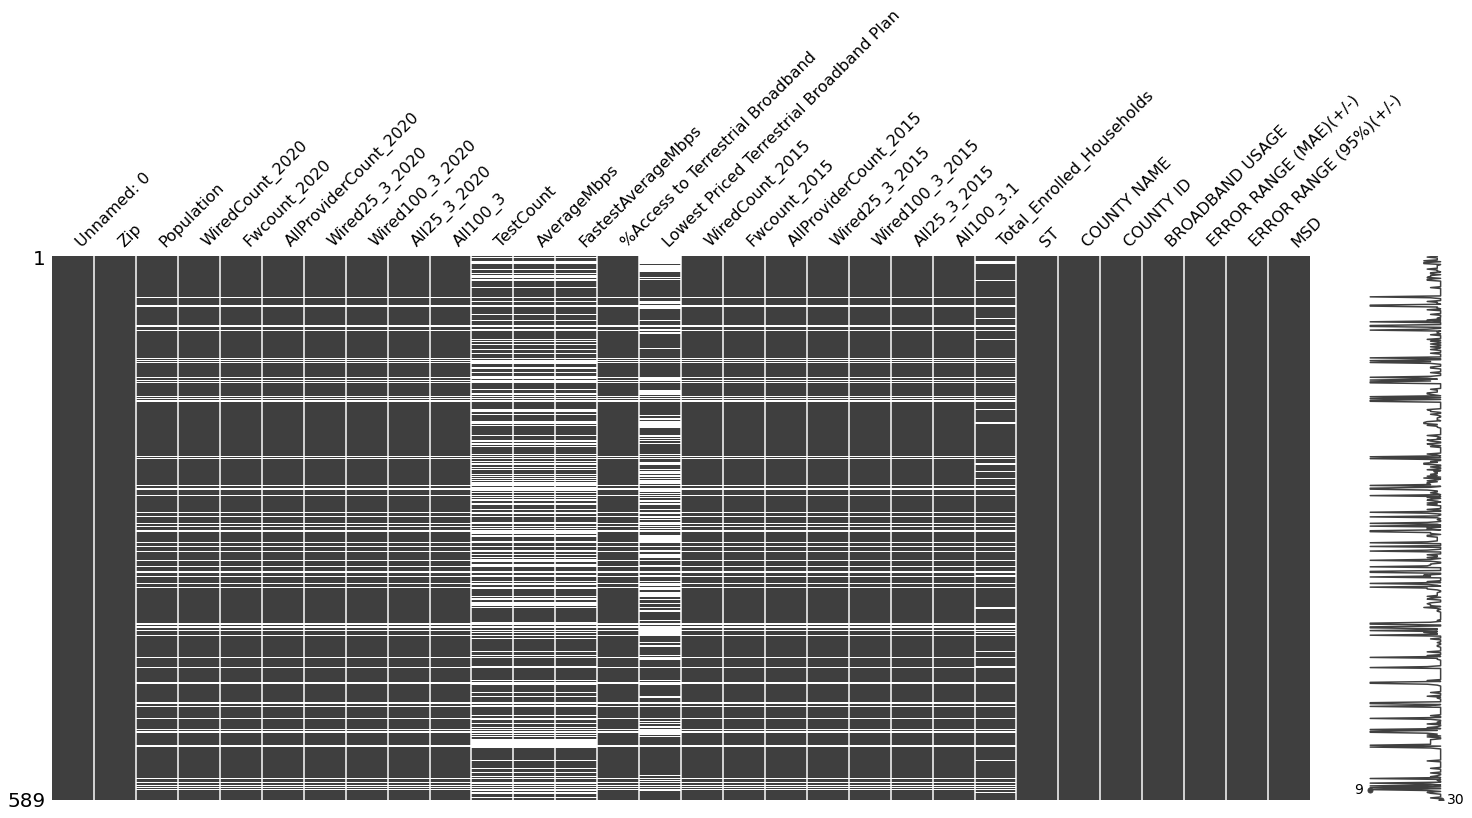

In [20]:
msno.matrix(ar_df)


In [21]:
# To select only the rows with NaN values
ar_df_missing = ar_df[pd.isnull(ar_df).any(axis=1)]
ar_df_missing
## Notice that we have 286 observations/rows that contain one or more missing values. Thats roughly 48.6% of data contains missing values

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
890,890,72003,746.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,164.0,11.26,20.40,1%,NaN,1.0,0.0,3.0,1.0,0.0,1.0,0.0,8.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
891,891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,AR,Arkansas,5001,1.000,0.197,0.869,0.022
892,892,72055,849.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0,18.20,19.47,52%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
893,893,72073,1139.0,1.0,1.0,7.0,0.0,0.0,2.0,0.0,12.0,1.44,1.69,0%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,21.0,AR,Arkansas,5001,0.086,0.027,0.086,0.001
894,894,72026,393.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,2.49,4.47,24%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,AR,Arkansas,5001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,32171,72123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Woodruff,5147,0.133,0.065,0.228,0.013
32172,32172,72036,817.0,1.0,1.0,7.0,1.0,0.0,3.0,0.0,NaN,NaN,NaN,2%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,31.0,AR,Woodruff,5147,0.000,0.034,0.110,0.002
32512,32512,72828,114.0,1.0,0.0,5.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,100%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,AR,Yell,5149,1.000,0.197,0.869,0.022
32513,32513,72838,115.0,1.0,0.0,4.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,100%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,AR,Yell,5149,0.392,0.152,0.608,0.043


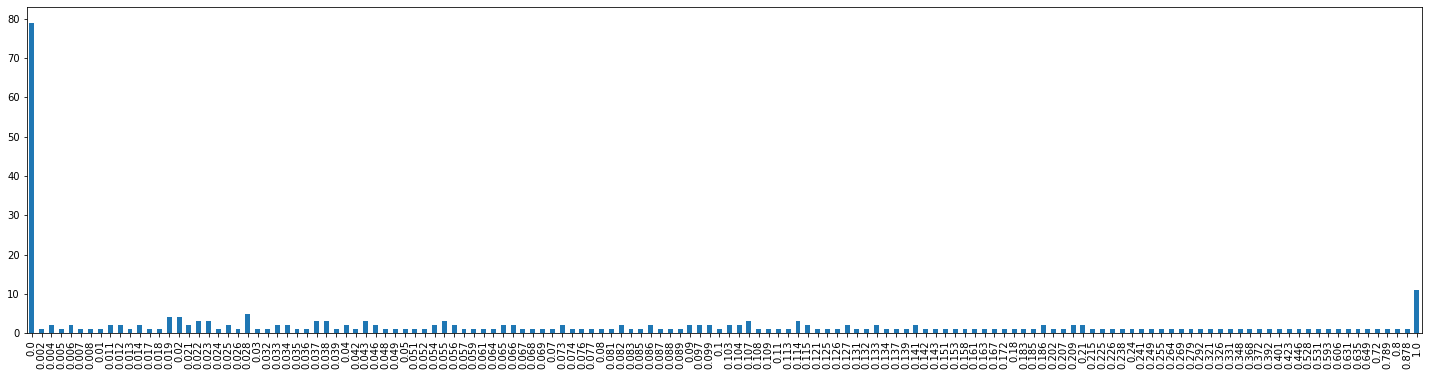

In [29]:
# Try to explore more on the broadband usage and missing values
ar_df_missing['BROADBAND USAGE'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(25, 6));

## Below we can see that interstingly, for both broadband usage = 0 and 1, there are a lot missing values in AR.

In [42]:
## curious to see what are entries for broadband usage =1, but has missing values
ar_df_missing_1 = ar_df_missing[ar_df_missing['BROADBAND USAGE'] == 1.0]
ar_df_missing_1

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
891,891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,AR,Arkansas,5001,1.0,0.197,0.869,0.022
3552,3552,71711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Calhoun,5013,1.0,0.197,0.869,0.022
6466,6466,72467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Craighead,5031,1.0,0.197,0.869,0.022
9959,9959,72515,63.0,1.0,0.0,5.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,AR,Fulton,5049,1.0,0.197,0.869,0.022
19529,19529,72338,52.0,1.0,2.0,9.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,0%,NaN,0.0,1.0,3.0,0.0,0.0,0.0,0.0,NaN,AR,Mississippi,5093,1.0,0.197,0.869,0.022
23057,23057,72328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Phillips,5107,1.0,0.197,0.869,0.022
23638,23638,72377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Poinsett,5111,1.0,0.197,0.869,0.022
24159,24159,72099,616.0,2.0,0.0,8.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,100%,40.00,2.0,0.0,4.0,1.0,1.0,1.0,1.0,NaN,AR,Pulaski,5119,1.0,0.197,0.869,0.022
26545,26545,72669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Searcy,5129,1.0,0.197,0.869,0.022
30523,30523,72749,84.0,1.0,0.0,5.0,1.0,0.0,3.0,1.0,NaN,NaN,NaN,100%,69.90,2.0,0.0,4.0,1.0,0.0,1.0,0.0,NaN,AR,Washington,5143,1.0,0.152,0.608,0.043


In [32]:
## what percentage of datapoints are missing by State
ar_df_missing.groupby('COUNTY NAME').apply(lambda x: x.isnull().sum()/len(x)*100)


,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
COUNTY NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arkansas,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,50.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ashley,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714,14.285714,14.285714,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baxter,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,0.000000,28.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Benton,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boone,0.0,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Union,0.0,0.0,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,100.000000,100.000000,100.000000,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Washington,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White,0.0,0.0,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,71.428571,71.428571,71.428571,28.571429,57.142857,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0


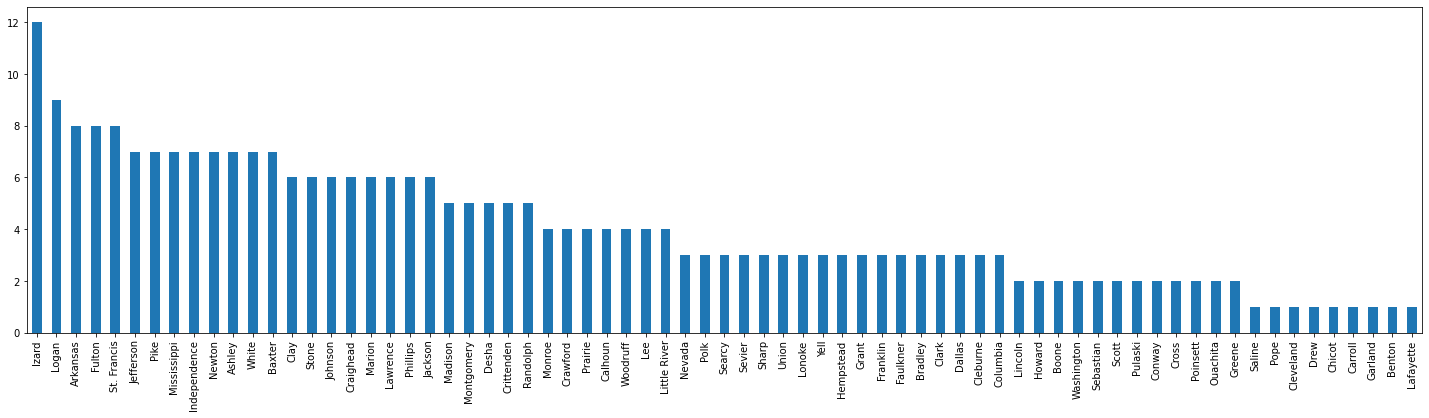

In [36]:
# Look at county vs. missing values in AR
ar_df_missing['COUNTY NAME'].value_counts().plot(kind='bar',figsize=(25, 6));

## Izard has more missing values than others.
## combined with the above table, most of the missing entries are from the lowest price plan column.

###2.Census Dataset

In [ ]:
df_census.head()

,NAME,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer
0,"Census Tract 11, Jefferson County, Alabama",39.0,42.5,38.1,1,73,1100,51.0,37030,1851,2.51,3.28,4781,85500,1.6,0.4,96.8,1.2,0.0,0.0,0.0,0.0,53.8,0.150376,0.333942,0.415931,0.740140,0.0,0.740140,0.572123,0.160994,0.158833,0.090222,0.009184,0.0,0.011345,0.248514,0.808212,0.0,0.740140,0.068071,0.191788
1,"Census Tract 14, Jefferson County, Alabama",44.3,40.5,49.1,1,73,1400,45.4,36066,816,2.38,3.42,1946,67800,0.0,6.8,91.7,0.0,0.0,0.0,1.1,0.4,53.3,0.281603,0.171115,0.419287,0.724265,0.0,0.724265,0.518382,0.131127,0.182598,0.049020,0.000000,0.0,0.020833,0.254902,0.856618,0.0,0.710784,0.145833,0.143382
2,"Census Tract 20, Jefferson County, Alabama",34.0,31.0,36.4,1,73,2000,47.7,27159,1419,2.41,3.20,4080,68400,27.7,7.5,63.8,0.0,0.0,0.0,0.0,0.9,51.8,0.513352,0.091720,0.417949,0.545455,0.0,0.545455,0.422833,0.086681,0.105708,0.046512,0.000000,0.0,0.000000,0.454545,0.713178,0.0,0.545455,0.167724,0.286822
3,"Census Tract 38.02, Jefferson County, Alabama",35.8,31.7,37.3,1,73,3802,51.7,38721,1894,2.79,3.61,5291,64100,1.6,0.0,97.5,0.0,0.0,0.0,0.0,0.9,50.1,0.196560,0.082275,0.401005,0.600317,0.0,0.600317,0.445618,0.134108,0.139916,0.039599,0.000000,0.0,0.063358,0.336325,0.857445,0.0,0.594509,0.262936,0.142555
4,"Census Tract 40, Jefferson County, Alabama",52.1,51.6,53.8,1,73,4000,36.9,18525,1429,1.73,2.70,2533,67300,6.6,6.8,85.7,0.9,0.0,0.0,0.0,0.0,48.9,0.405843,0.098935,0.456671,0.473758,0.0,0.473758,0.307208,0.190343,0.130861,0.045486,0.019594,0.0,0.051085,0.475157,0.630511,0.0,0.447866,0.182645,0.369489


In [ ]:
df_census.isnull().sum()

## looks like there's no missing values for the variables we are looking at in the census datesets

NAME                                  0
median_age_overall                    0
median_age_male                       0
median_age_female                     0
state                                 0
county                                0
tract                                 0
employment_rate                       0
median_income                         0
total_households                      0
ave_household_size                    0
ave_family_size                       0
total_population                      0
median_house_value                    0
pct_white                             0
pct_hisp_latino                       0
pct_black                             0
pct_native                            0
pct_asian                             0
pct_hi_pi                             0
pct_other_race                        0
pct_two+_race                         0
pct_rent_burdened                     0
poverty_rate                        701
pct_pop_bachelors+                  531


In [ ]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73056 entries, 0 to 73055
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NAME                              73056 non-null  object 
 1   median_age_overall                73056 non-null  float64
 2   median_age_male                   73056 non-null  float64
 3   median_age_female                 73056 non-null  float64
 4   state                             73056 non-null  int64  
 5   county                            73056 non-null  int64  
 6   tract                             73056 non-null  int64  
 7   employment_rate                   73056 non-null  float64
 8   median_income                     73056 non-null  int64  
 9   total_households                  73056 non-null  int64  
 10  ave_household_size                73056 non-null  float64
 11  ave_family_size                   73056 non-null  float64
 12  tota

In [ ]:
df_census.describe()

## we can see that there are min value of -666666666 and -1 that doesn't make sense
## So we need to replace them with NA

,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer
count,7.305600e+04,7.305600e+04,7.305600e+04,73056.000000,73056.000000,73056.000000,7.305600e+04,7.305600e+04,73056.000000,7.305600e+04,7.305600e+04,73056.000000,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,7.305600e+04,72355.000000,72525.000000,72525.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000,72409.000000
mean,-4.891199e+06,-5.119335e+06,-5.566479e+06,27.739816,85.940292,258659.790503,-5.228816e+06,-8.247670e+06,1437.429862,-6.917066e+06,-7.108699e+06,3416.954391,-1.486473e+07,-4.790801e+06,-4.790831e+06,-4.790835e+06,-4.790845e+06,-4.790841e+06,-4.790845e+06,-4.790845e+06,-4.790844e+06,-1.469189e+07,0.265467,1.529215,0.222142,0.872233,0.334955,0.869695,0.759411,0.404017,0.429497,0.374174,0.339068,0.333431,0.354233,0.438369,0.926539,0.334850,0.864639,0.391885,0.405878
std,5.689409e+07,5.819575e+07,6.066357e+07,15.785590,99.649681,349632.595711,5.881001e+07,7.394690e+07,974.554514,6.755439e+07,6.847383e+07,2803.627023,9.917411e+07,5.631153e+07,5.631153e+07,5.631153e+07,5.631153e+07,5.631153e+07,5.631153e+07,5.631153e+07,5.631153e+07,1.391893e+08,0.312392,1.748267,0.172740,0.133245,0.469342,0.134910,0.200723,0.423837,0.405756,0.443551,0.466620,0.470400,0.456609,0.406271,0.084886,0.469415,0.139202,0.432272,0.424599
min,-6.666667e+08,-6.666667e+08,-6.666667e+08,1.000000,1.000000,100.000000,-6.666667e+08,-6.666667e+08,-1.000000,-6.666667e+08,-6.666667e+08,-1.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-1.333333e+09,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,12.000000,29.000000,10300.000000,4.710000e+01,3.486800e+04,856.750000,2.130000e+00,2.760000e+00,1129.000000,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+00,0.071713,0.200165,-0.000000,0.788902,0.000000,0.783916,0.606383,0.076646,0.122399,0.039297,0.000000,0.000000,0.017988,0.106536,0.879012,0.000000,0.775748,0.059786,0.070829
50%,3.440000e+01,3.310000e+01,3.530000e+01,27.000000,63.000000,44800.000000,5.780000e+01,5.357250e+04,1415.000000,2.480000e+00,3.060000e+00,3408.000000,1.510000e+05,4.810000e+01,4.900000e+00,1.800000e+00,0.000000e+00,7.000000e-01,0.000000e+00,0.000000e+00,1.100000e+00,4.240000e+01,0.138186,0.409121,0.280096,0.898277,0.006012,0.895141,0.734155,0.140260,0.178551,0.080808,0.012899,0.000000,0.042927,0.217687,0.950800,0.005811,0.890162,0.119503,0.152108
75%,4.190000e+01,4.050000e+01,4.340000e+01,41.000000,109.000000,470501.000000,6.450000e+01,7.551625e+04,1986.000000,2.810000e+00,3.370000e+00,5053.000000,2.991000e+05,8.050000e+01,1.830000e+01,9.600000e+00,2.000000e-01,4.200000e+00,0.000000e+00,0.000000e+00,2.725000e+00,5.580000e+01,0.276496,4.000000,0.365403,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [ ]:
## Make replacement for -1 and -666666666 to NA
df_census_modified = df_census.replace(-1,np.nan)
df_census_modified = df_census_modified.replace(-666666666,np.nan)

In [ ]:
# Now look at the modified datasets, we saw more missing values
df_census_modified.isnull().sum()

NAME                                    0
median_age_overall                  24606
median_age_male                     24631
median_age_female                   24680
state                                   0
county                                  0
tract                                   0
employment_rate                     10517
median_income                       10854
total_households                     9944
ave_household_size                  10702
ave_family_size                     10723
total_population                    16825
median_house_value                  18478
pct_white                           17350
pct_hisp_latino                     17350
pct_black                           17350
pct_native                          17350
pct_asian                           17350
pct_hi_pi                           17350
pct_other_race                      17350
pct_two+_race                       17350
pct_rent_burdened                       0
poverty_rate                      

In [ ]:
## To calculate the %of missing values for each variable for Census data
(
    ( 
        df_census_modified.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(df_census_modified)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
median_age_female,33.8
median_age_male,33.7
median_age_overall,33.7
median_house_value,25.3
pct_two+_race,23.7
pct_other_race,23.7
pct_hi_pi,23.7
pct_asian,23.7
pct_native,23.7
pct_black,23.7


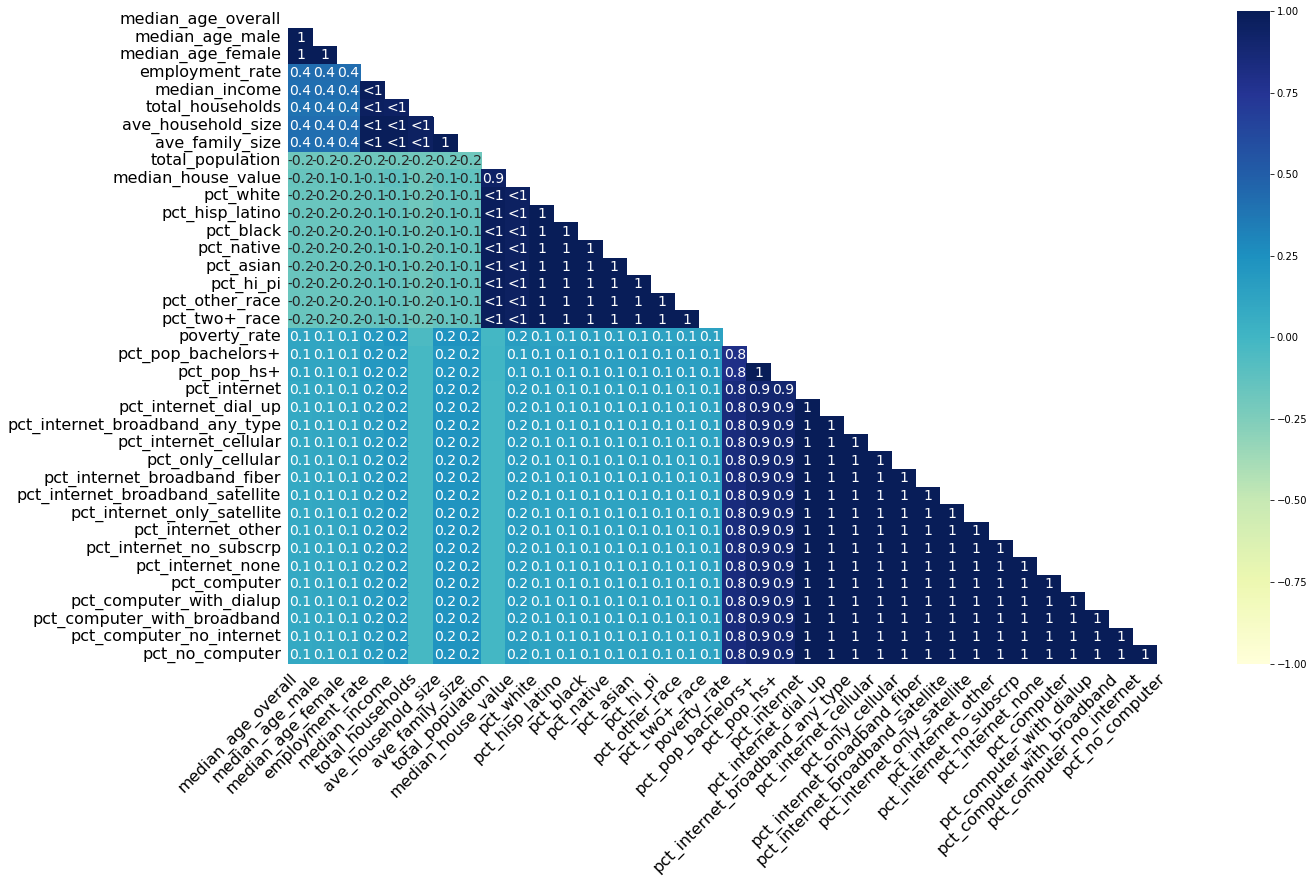

In [ ]:
msno.heatmap(df_census_modified, cmap='YlGnBu')

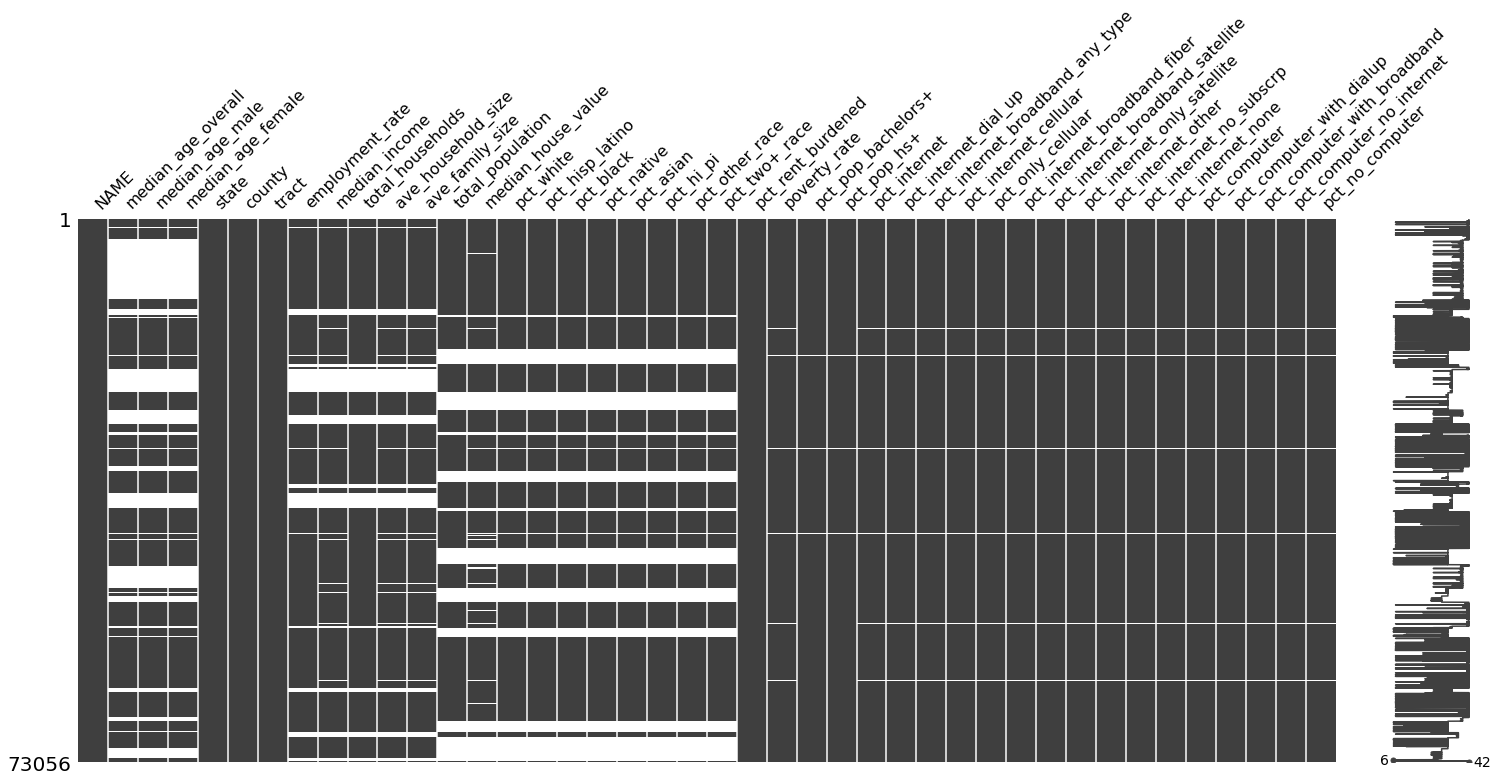

In [ ]:
msno.matrix(df_census_modified)

In [ ]:
# To select only the rows with NaN values
df_census_missing = df_census_modified[pd.isnull(df_census_modified).any(axis=1)]
df_census_missing
## Notice that we have 40712 observations/rows that contain one or more missing values. Thats roughly 55.7% of data contains missing values

,NAME,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer
309,"Census Tract 2, Montgomery County, Alabama",44.3,37.0,55.9,1,101,200,24.5,31136.0,316.0,1.65,3.14,1278.0,NaN,23.5,0.5,75.1,0.5,0.0,0.0,0.0,0.3,4.090000e+01,0.298791,0.131148,0.313416,0.667722,0.000000,0.667722,0.651899,0.221519,0.015823,0.053797,0.000000,0.000000,0.018987,0.313291,0.693038,0.000000,0.613924,0.079114,0.306962
311,"Census Tract 9, Montgomery County, Alabama",32.7,35.4,21.7,1,101,900,10.5,91250.0,285.0,3.24,3.43,2171.0,NaN,55.7,13.7,24.0,0.2,0.5,0.6,0.0,5.4,2.020000e+01,0.009740,0.303658,0.475020,0.964912,0.000000,0.964912,0.873684,0.077193,0.091228,0.007018,0.000000,0.000000,0.010526,0.024561,0.975439,0.000000,0.964912,0.010526,0.024561
315,"Census Tract 53.01, Montgomery County, Alabama",23.6,22.1,26.9,1,101,5301,27.6,69028.0,295.0,3.06,3.29,1058.0,NaN,43.5,11.4,30.6,0.0,2.6,0.0,0.6,11.2,3.030000e+01,0.000000,0.290722,0.584105,0.966102,0.000000,0.966102,0.877966,0.000000,0.088136,0.030508,0.000000,0.000000,0.033898,0.000000,1.000000,0.000000,0.966102,0.033898,0.000000
457,"Census Tract 9800, Shelby County, Alabama",NaN,NaN,NaN,1,117,980000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,"Census Tract 9900, Mobile County, Alabama",NaN,NaN,NaN,1,97,990000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72868,"Census Tract 1.02, Hillsborough County, New Ha...",34.6,34.1,35.1,33,11,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000e+00,1.000000,0.575112,0.278733,0.935676,0.004324,0.931351,0.790811,0.043784,0.140541,0.036757,0.000000,0.000000,0.014054,0.050270,0.944865,0.004324,0.922162,0.018378,0.055135
72869,"Census Tract 14, Hillsborough County, New Hamp...",35.8,40.1,32.8,33,11,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000e+00,1.000000,0.116248,0.325044,0.701973,0.000000,0.701973,0.591900,0.236760,0.099688,0.016615,0.010384,0.000000,0.028037,0.269990,0.773624,0.000000,0.673936,0.099688,0.226376
72870,"Census Tract 106, Hillsborough County, New Ham...",37.4,38.9,33.7,33,11,10600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000e+00,1.000000,0.163741,0.445681,0.892443,0.000000,0.892443,0.723311,0.131547,0.165134,0.000000,0.000000,0.003998,0.011595,0.095962,0.950020,0.000000,0.892443,0.057577,0.049980
72871,"Census Tract 114.02, Hillsborough County, New ...",40.9,43.2,38.6,33,11,11402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000e+00,1.000000,0.426119,0.246672,0.953379,0.000000,0.953379,0.739130,0.083290,0.214248,0.000000,0.000000,0.000000,0.006286,0.040335,0.971189,0.000000,0.953379,0.017810,0.028811


In [ ]:
## Next we want to look at what percentage of datapoints are missing by State
df_census_modified.groupby('to be added').apply(lambda x: x.isnull().sum()/len(x)*100)